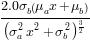

In [569]:
#プロトタイプ
%matplotlib inline
from sympy import *
init_printing()
y,x,ua,ub,sa,sb,x,d = symbols('y,x,mu_a,mu_b,sigma_a,sigma_b,x,d')
f = 0.5 + 0.5 * erf((ua*x+ub)/sqrt(sa*sa*x*x+sb*sb))
p = exp(-(ua*x+ub)**2/(sa*sa*x*x+sb*sb))/sqrt(pi)
display(diff((d-f)**2, sb)/p/(d-f))

array([[-1.56892409,  2.83832354],
       [ 1.83826393, -2.60996523]])

array([[-0.64148405],
       [ 0.37461872]])

array([[ 1.,  1.],
       [ 1.,  1.]])

array([[ 1.],
       [ 1.]])

array([[ 0.01401596],
       [ 0.9873027 ]])

array([[ 0.98646158],
       [ 0.01345287]])

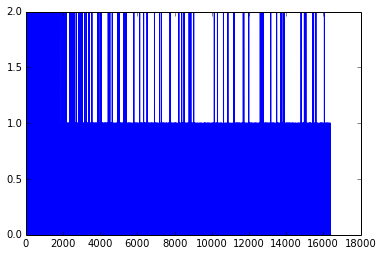

In [591]:
#プロトタイプ
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,1],[1,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[1,0],[0,1]])
WU = normal(0,1,(2,2))
WS = ones((2,2))
BU = normal(0,1,(2,1))
BS = ones((2,1))
eps = 0.1
err = []

def F(x, u, s):
    return 0.5 + 0.5 * erf((x-u)/s)
    
def P(x, u, s):
    return exp(-((x-u)/s)**2)/sqrt(pi)/s    

for k in range(2**14):
    X = I[ k % 2 ]
    Y = O[ k % 2 ]
    B = zeros((2,1),dtype='float64')
    W = zeros((2,2),dtype='float64')

    V  = dot(W,     X   )+B
    VU = dot(WU,    X   )+BU
    VV = dot(WS**2, X**2)+BS**2
    VS = sqrt(VV)
    F = 0.5 + 0.5*erf(-VU/VS)
    E = Y - F
    J = P(0, VU, VS)
    
    V[0] = normal(WU[0,0],abs(WS[0,0])) * X[0] + normal(WU[0,1],abs(WS[0,1])) * X[1] + normal(BU[0],abs(BS[0]))
    V[1] = normal(WU[1,0],abs(WS[1,1])) * X[0] + normal(WU[1,1],abs(WS[1,1])) * X[1] + normal(BU[1],abs(BS[1]))
    VU[0] = WU[0,0]*X[0] + WU[0,1] * X[1] + BU[0]
    VU[1] = WU[1,0]*X[0] + WU[1,1] * X[1] + BU[1]
    VV[0] = (WS[0,0]*X[0])**2 + (WS[0,1]*X[1])**2
    VV[1] = (WS[1,0]*X[0])**2 + (WS[1,1]*X[1])**2
    VS[0] = sqrt(VV[0])
    VS[1] = sqrt(VV[1])
    E[0] = Y[0] - (0<V[0])
    E[1] = Y[1] - (0<V[1])
    J[0] = exp(-VU[0]*VU[0])/sqrt(pi)
    J[1] = exp(-VU[1]*VU[1])/sqrt(pi)
    WU[0,0] = WU[0,0] + eps * E[0] * J[0] * X[0] / VS[0]
    WU[0,1] = WU[0,1] + eps * E[0] * J[0] * X[1] / VS[0]
    WU[1,0] = WU[1,0] + eps * E[1] * J[1] * X[0] / VS[1]
    WU[1,1] = WU[1,1] + eps * E[1] * J[1] * X[1] / VS[1]
    BU[0] = BU[0] + eps * E[0] * J[0] / VS[0]
    BU[1] = BU[1] + eps * E[1] * J[1] / VS[1]
#    WS[0,0] = WS[0,0] + eps * E[0] * J[0] * 2 * WS[0,0] * X[0] * X[0] * VU[0] / VV[0] / VS[0]
#    WS[0,1] = WS[0,1] + eps * E[0] * J[0] * 2 * WS[0,1] * X[1] * X[1] * VU[0] / VV[0] / VS[0]
#    WS[1,0] = WS[1,0] + eps * E[1] * J[1] * 2 * WS[1,0] * X[0] * X[0] * VU[1] / VV[1] / VS[1]
#    WS[1,1] = WS[1,1] + eps * E[1] * J[1] * 2 * WS[1,1] * X[1] * X[1] * VU[1] / VV[1] / VS[1]   
#    BS[0]   = BS[0]   - eps * E[0] * J[0] * BS[0] * VU[0] / VV[0] / VS[0]
#    BS[1]   = BS[1]   - eps * E[1] * J[1] * BS[1] * VU[1] / VV[1] / VS[1]
    
    err.append(dot(E.T, E)[0])

display(WU,BU,WS,BS)
X = I[0]
VU = dot(WU,    X   )+BU
VV = dot(WS**2, X**2)+BS**2
VS = sqrt(VV)
F = 0.5 + 0.5 * erf(-VU/VS)
display(F)
X = I[1]
VU = dot(WU,    X   )+BU
VV = dot(WS**2, X**2)+BS**2
VS = sqrt(VV)
F = 0.5 + 0.5 * erf(-VU/VS)
display(F)
plot(err)

array([[ 0.,  0.,  0.,  0.]])

array([[  1.18156534e-03,   7.15182110e-06,   1.62937991e-03,
          3.16096659e-03]])

array([[ 0.,  0.,  0.,  1.]])

array([[  8.73043735e-04,   1.12078431e-02,   5.86480916e-07,
          9.38532307e-01]])

array([[ 0.,  0.,  1.,  0.]])

array([[  1.16117710e-03,   1.01555150e-02,   9.30902176e-01,
          2.84986666e-07]])

array([[ 0.,  0.,  1.,  1.]])

array([[  8.11783656e-04,   9.40980328e-01,   4.54370335e-03,
          2.93959724e-03]])

array([[ 0.,  1.,  0.,  0.]])

array([[  9.60839608e-01,   1.02841076e-04,   5.99106582e-04,
          5.86312849e-04]])

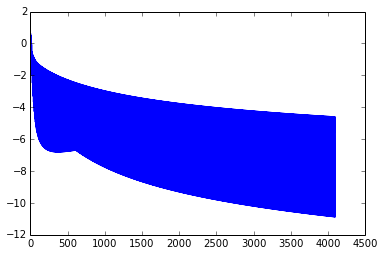

In [536]:
#角層クロスエントロピー
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 0.1, (16, 1))
HW=normal(0, 0.1, (16, 4))
OB=normal(0, 0.1, (4,  1))
OW=normal(0, 0.1, (4, 16))

eps = 0.001
k = 0
r = 8
err = []
for idx in range(2**12):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    E = Ok - OO
    C = (Ok)/(OO) - (1-Ok)/(1-OO)
    DB = r * ( 1 - OO * OO ) * E
    DB[isnan(DB)] = 0
    DX = 0.5 + 0.5 * tanh(r * dot(transpose(OW), Ok))
    
    DW = dot(DB, transpose(HO))
    OW = OW + eps * DW
    OB = OB + eps * DB

    #H update
    E = DX - HO
    C = (DX)/(HO) - (1-DX)/(1-HO)
    DB = r * ( 1 - HO * HO ) * C
    DB[isnan(DB)] = 0
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[  5.56286965e-03,   9.99999509e-01,   9.99934829e-01,
          8.83737528e-14]])

1

array([[0, 0, 0, 1]])

array([[  3.88578059e-16,   1.00000000e+00,   5.55111512e-17,
          9.99999377e-01]])

2

array([[0, 0, 1, 0]])

array([[  5.37700000e-06,   8.91843786e-01,   1.00000000e+00,
          3.88578059e-16]])

3

array([[0, 0, 1, 1]])

array([[  1.68753900e-14,   1.00000000e+00,   4.23594493e-12,
          7.29975889e-04]])

4

array([[0, 1, 0, 0]])

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.67699188e-13]])

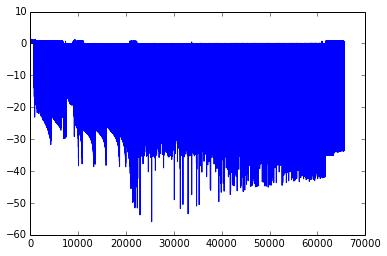

In [219]:
#角層最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 1, (16, 1))
HW=normal(0, 1, (16, 4))
OB=normal(0, 1, (4,  1))
OW=normal(0, 1, (4, 16))

eps = 0.05
k = 0
r = 8
err = []
for idx in range(2**16):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = r * ( 1 - OO * OO ) * ( Ok - OO )
    DX = dot(transpose(OW), Ok)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = r * ( 1 - HO * HO ) * ( DX - HO )
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[  3.86025784e-09,   0.00000000e+00,   3.17650951e-08,
          2.58843008e-09]])

1

array([[0, 0, 0, 1]])

array([[  1.39200062e-06,   2.17866038e-04,   0.00000000e+00,
          9.83591835e-01]])

2

array([[0, 0, 1, 0]])

array([[  2.54796184e-14,   2.90286239e-10,   9.99996296e-01,
          0.00000000e+00]])

3

array([[0, 0, 1, 1]])

array([[  1.16173583e-05,   9.88799466e-01,   1.87627691e-14,
          4.62872728e-04]])

4

array([[0, 1, 0, 0]])

array([[  9.96414485e-01,   3.49154039e-12,   6.83682873e-08,
          4.48720050e-09]])

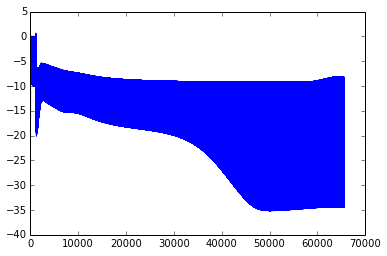

In [257]:
#ただの最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 1, (16, 1))
HW=normal(0, 1, (16, 4))
OB=normal(0, 1, (4,  1))
OW=normal(0, 1, (4, 16))

eps = 0.01
k = 0
r = 8
err = []
for idx in range(2**16):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    DX = Ok - OO
    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = DX * r * (1 - OO * OO)
    DX = dot(transpose(OW), DB)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = DX * r * (1 - HO * HO)
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)
    
plot(log(err))

In [325]:
A = normal(1,3,2**16)
B = normal(3,4,2**16)
display(mean(A+B),var(A+B))

3.9694962053380296

24.740857629454453